# ПРОМЫШЛЕННОСТЬ.

# Краткое описание проекта. 

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали.

# Цель проекта.

Нам предстоит построить модель, которая предскажет температуру стали.

# Описание данных.

Данные состоят из файлов, полученных из разных источников:
- data_arc_new.csv — данные об электродах;
- data_bulk_new.csv — данные о подаче сыпучих материалов (объём);
- data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);
- data_gas_new.csv — данные о продувке сплава газом;
- data_temp_new.csv — результаты измерения температуры;
- data_wire_new.csv — данные о проволочных материалах (объём);
- data_wire_time_new.csv — данные о проволочных материалах (время).

# План работы.

**1. Первичное исследование и изучение данных.**
- загрузка данных;
- получение общей информации о датафреймах + визуализация распределения признаков;
- выводы по разделу.

**2. Предобработка данных.**
- удаление аномалий;
- заполнение пропусков в данных;
- генерация новых признаков;
- агрегирование всех датафреймов в один по ключу.
- выводы по разделу.

**3. Исследование объединённого датафрема.**
- корреляция признаков
- выводы по разделу.

**4. Подготовка полученного датафрейма к обучению.**
- разделение на выборки;
- масштабирование признаков.
- выводы по разделу.

**5. Подбор и обучение различных моделей машинного обучения. Выбор лучшей модели.**
- выводы по разделу.

**6. Тестирование модели-победителя**
- выводы по разделу.

**7. Исследование важности признаков модели-победителя.**
- выводы по разделу.

**8. Проверка модели на адекватность(сравнение с константной моделью).**
- выводы по разделу.

**9. Отчёт**

##  Первичное исследование и изучение данных.

### Загрузка данных

Загрузим все необходимые для работы библиотеки и модули.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

Считаем данные из csv-файлов в датафреймы и сохраним в переменные с одноименными названиями. Например данные из файла data_gas_new.csv сохраним в переменную data_gas_new.

In [3]:
try:
    data_arc_new = pd.read_csv('data_arc_new.csv')
    data_bulk_new = pd.read_csv('data_bulk_new.csv')
    data_bulk_time_new = pd.read_csv('data_bulk_time_new.csv')
    data_gas_new =  pd.read_csv('data_gas_new.csv')
    data_temp_new = pd.read_csv('data_temp_new.csv')
    data_wire_new = pd.read_csv('data_wire_new.csv')
    data_wire_time_new = pd.read_csv('data_wire_time_new.csv')
except:
    data_arc_new = pd.read_csv('/datasets/data_arc_new.csv')
    data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
    data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
    data_gas_new =  pd.read_csv('/datasets/data_gas_new.csv')
    data_temp_new = pd.read_csv('/datasets/data_temp_new.csv')
    data_wire_new = pd.read_csv('/datasets/data_wire_new.csv')
    data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')

###  Получение общей информации + визуализация признаков.

**Так как в нашем распоряжении несколько датафреймов, то для удобства представления информации о каждом, объединим пункт 1.2 и 1.3.**

Для начала напишем функцию, которая на вход будет принимать датафрейм, а возвращать будет всю основную о нём информацию(несколько строк, краткую статистическую сводку для данных, типы данных и количество строк, а так же количество пропусков в каждом столбце).После информации визуализируем признаки.

In [4]:
def opening(data):
    display(data.head())
    display(data.describe())
    display(data.info())
    display(data.isnull().sum())

#### Данные об электродах.

In [5]:
opening(data_arc_new)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

Посчитаем количество уникальных значений ключей.

In [6]:
data_arc_new['key'].nunique()

3214

Посмотрим на графике активную мощность

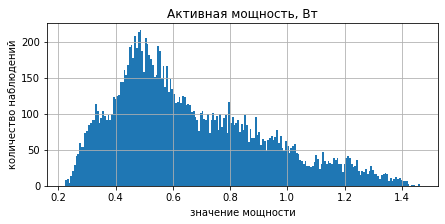

In [7]:
data_arc_new['Активная мощность'].hist(bins=200, figsize=(7,3))
plt.title('Активная мощность, Вт')
plt.xlabel('значение мощности')
plt.ylabel('количество наблюдений');

Взглянем на реактивную мощность

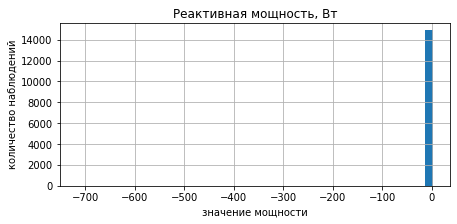

In [8]:
data_arc_new['Реактивная мощность'].hist(bins=50, figsize=(7,3))
plt.title('Реактивная мощность, Вт')
plt.xlabel('значение мощности')
plt.ylabel('количество наблюдений');

Посмотрим на диаграмму размаха

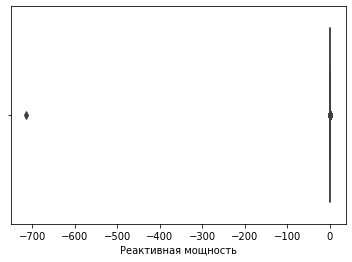

In [9]:
sns.boxplot(x=data_arc_new['Реактивная мощность']);

**Первый график смещен влево,а на диаграмме размаха четко виден выброс, это аномалии в данных. Выведем отсортированный по возрастанию список значений реактивной мощности.**

In [10]:
data_arc_new['Реактивная мощность'].sort_values()

9780    -715.479924
709        0.153777
3290       0.153921
11794      0.155221
6130       0.156525
            ...    
8963       1.214912
14115      1.222632
8116       1.223063
3452       1.258628
2591       1.270284
Name: Реактивная мощность, Length: 14876, dtype: float64

**Промежуточные выводы:**
- отсутсвуют пропуски значений;
- значения активной мощности находятся в диапазоне от 0.25 до 1.5;
- в столбце с реактивной мощностью обнаружена аномалия с отрицательным значением(-715). Все остальные значения расположились в районе нуля;
- количество уникальных ключей 3214.

####  Данные о подаче сыпучих материалов (объём)

In [11]:
opening(data_bulk_new)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

Количество уникальных ключей

In [12]:
data_bulk_new['key'].nunique()

3129

**Отсортируем по убыванию номера контейнеров из которых добавляется сыпучий продукт (легирующая добавка) в наш расплав.**

In [13]:
data_bulk_new.sum().sort_values(ascending=False)

key        5082696.0
Bulk 12     638154.0
Bulk 14     477819.0
Bulk 15     360834.0
Bulk 3      147815.0
Bulk 4      105856.0
Bulk 6       68501.0
Bulk 10      14658.0
Bulk 11      13597.0
Bulk 1        9889.0
Bulk 5        8241.0
Bulk 7        7640.0
Bulk 2        5567.0
Bulk 13       3260.0
Bulk 9        1450.0
Bulk 8          49.0
dtype: float64

**Построим гистограммы по каждому контейнеру в порядке убывания.**

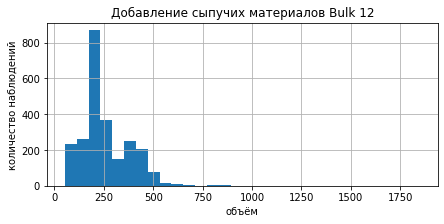

In [14]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 12'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 12')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

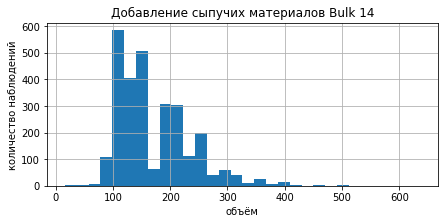

In [15]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 14'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 14')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

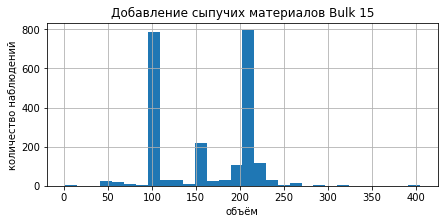

In [16]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 15'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 15')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

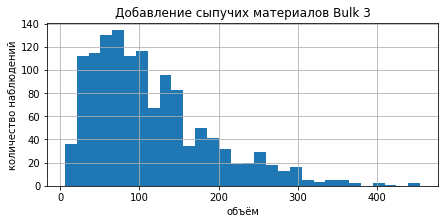

In [17]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 3'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 3')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

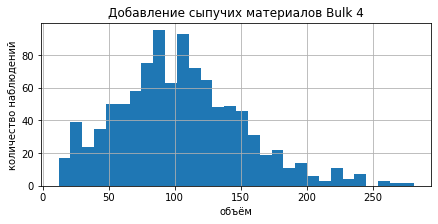

In [18]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 4'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 4')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

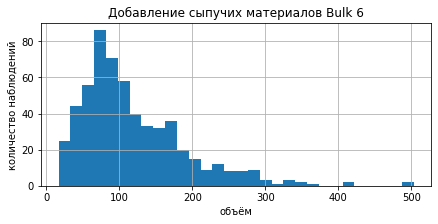

In [19]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 6'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 6')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

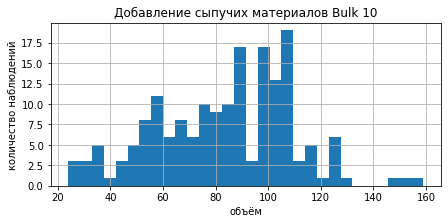

In [20]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 10'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 10')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

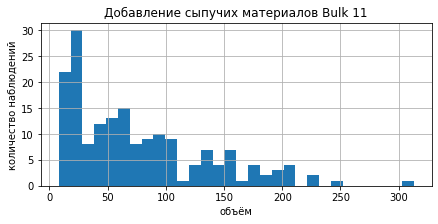

In [21]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 11'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 11')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

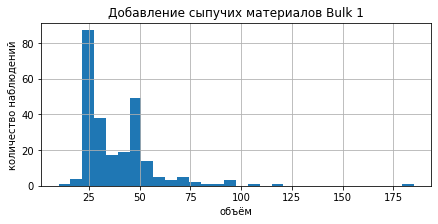

In [22]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 1'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 1')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

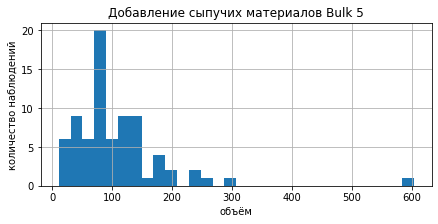

In [23]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 5'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 5')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

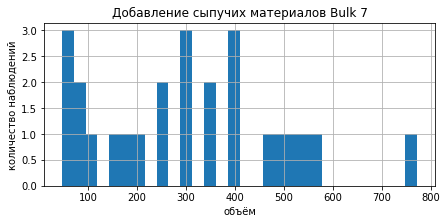

In [24]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 7'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 7')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

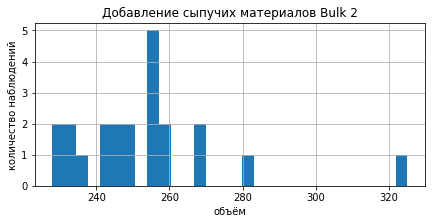

In [25]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 2'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 2')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

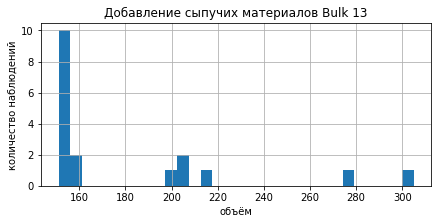

In [26]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 13'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 13')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

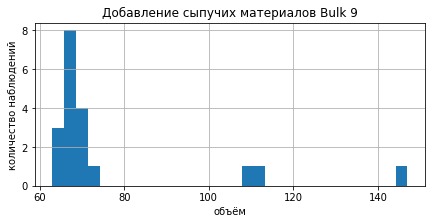

In [27]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 9'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 9')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

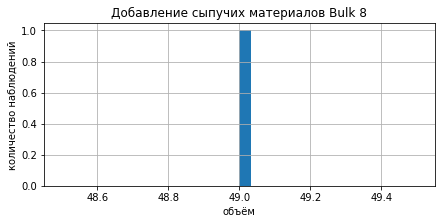

In [28]:
plt.figure(figsize=(7,3))
data_bulk_new['Bulk 8'].hist(bins=30)
plt.title('Добавление сыпучих материалов Bulk 8')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

Посмотрим на диаграммы размаха всех контенеров на одном графике.

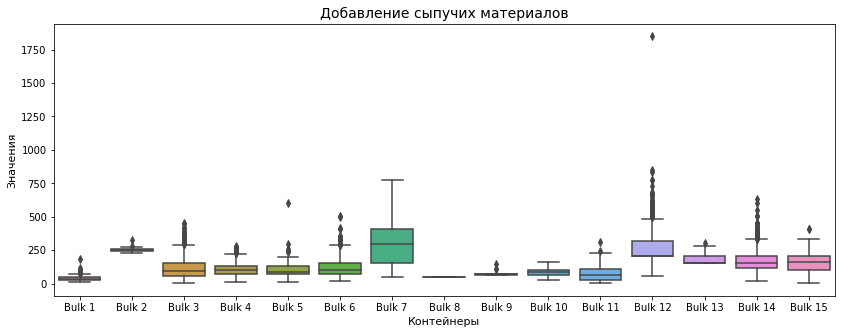

In [29]:
df_bulk = pd.DataFrame(data=data_bulk_new, columns=["Bulk 1", "Bulk 2", "Bulk 3", "Bulk 4","Bulk 5", "Bulk 6",
                                                    "Bulk 7", "Bulk 8", "Bulk 9","Bulk 10", "Bulk 11", "Bulk 12",
                                                    "Bulk 13", "Bulk 14", "Bulk 15"])
plt.figure(figsize=(14, 5))
boxplot_bulk = sns.boxplot(x="variable", y="value", data=pd.melt(df_bulk))
boxplot_bulk.axes.set_title("Добавление сыпучих материалов", fontsize=14)
boxplot_bulk.set_xlabel("Контейнеры", fontsize=11)
boxplot_bulk.set_ylabel("Значения", fontsize=11);

**Промежуточные выводы:**
- в таблице очень много пропусков в каждом столбце. Связываем это с тем, что на данном этапе в данной партии добавление материала не производилось. В будущем заменим эти значения нулями;
- лидером по суммарному добавлению примесей в сталь является 12 этап. За ним расположились 14,15,3 и 4 этапы. Самым скромным можем смело считать этап 8. На данном этапе примеси в сталь почти не вводили;
- количество уникальных ключей 3129.

#### Данные о подаче сыпучих материалов (время)

In [30]:
opening(data_bulk_time_new)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

#### Данные о продувке сплава газом

In [31]:
opening(data_gas_new)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

key      0
Газ 1    0
dtype: int64

Количетво уникальных ключей

In [32]:
data_gas_new['key'].nunique()

3239

ВИзуализация продувки сплава газом

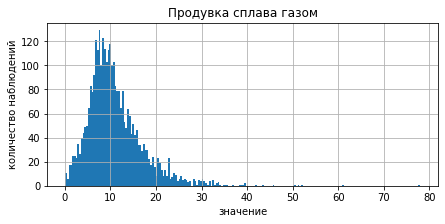

In [33]:
data_gas_new['Газ 1'].hist(bins=200, figsize=(7,3))
plt.title('Продувка сплава газом')
plt.xlabel('значение')
plt.ylabel('количество наблюдений');

**Промежуточные выводы:**
- отсутсвуют пропуски значений;
- значения продувки расположились в диапазоне от 0 до 30 с пиком в значении 8;
- количество уникальных ключей 3239.

#### Данные о проволочных материалах (объём)

In [34]:
opening(data_wire_new)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Количество уникальных ключей

In [35]:
data_wire_new['key'].nunique()

3081

**Отсортируем по убыванию номера контейнеров из которых добавляется проволочный материал в наш расплав.**

In [36]:
data_wire_new.sum().sort_values(ascending=False)

key       5.001777e+06
Wire 1    3.082368e+05
Wire 2    5.457293e+04
Wire 3    1.193741e+04
Wire 6    3.505239e+03
Wire 8    1.018879e+03
Wire 9    9.905168e+02
Wire 4    8.041998e+02
Wire 7    1.104291e+02
Wire 5    1.513200e+01
dtype: float64

**По аналогии с сыпучими примесями построим гистограммы по каждому контейнеру в порядке убывания.**

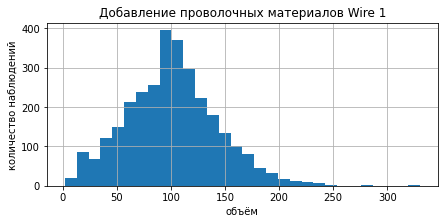

In [37]:
plt.figure(figsize=(7,3))
data_wire_new['Wire 1'].hist(bins=30)
plt.title('Добавление проволочных материалов Wire 1')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

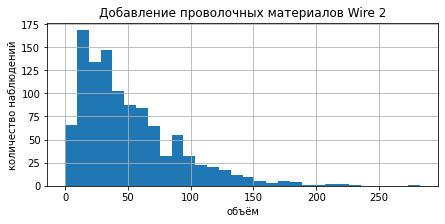

In [38]:
plt.figure(figsize=(7,3))
data_wire_new['Wire 2'].hist(bins=30)
plt.title('Добавление проволочных материалов Wire 2')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

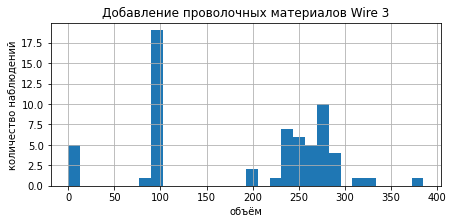

In [39]:
plt.figure(figsize=(7,3))
data_wire_new['Wire 3'].hist(bins=30)
plt.title('Добавление проволочных материалов Wire 3')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

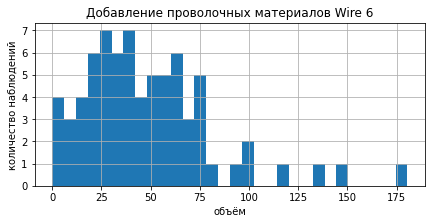

In [40]:
plt.figure(figsize=(7,3))
data_wire_new['Wire 6'].hist(bins=30)
plt.title('Добавление проволочных материалов Wire 6')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

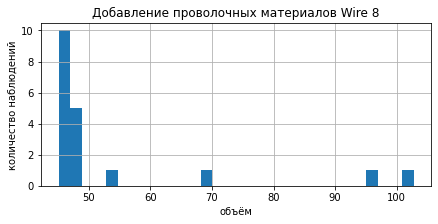

In [41]:
plt.figure(figsize=(7,3))
data_wire_new['Wire 8'].hist(bins=30)
plt.title('Добавление проволочных материалов Wire 8')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

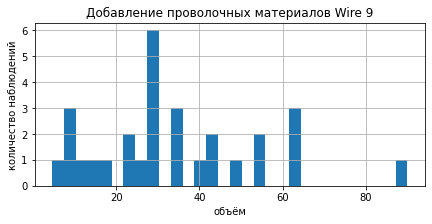

In [42]:
plt.figure(figsize=(7,3))
data_wire_new['Wire 9'].hist(bins=30)
plt.title('Добавление проволочных материалов Wire 9')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

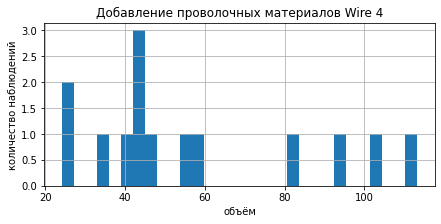

In [43]:
plt.figure(figsize=(7,3))
data_wire_new['Wire 4'].hist(bins=30)
plt.title('Добавление проволочных материалов Wire 4')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

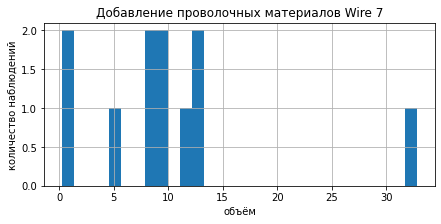

In [44]:
plt.figure(figsize=(7,3))
data_wire_new['Wire 7'].hist(bins=30)
plt.title('Добавление проволочных материалов Wire 7')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

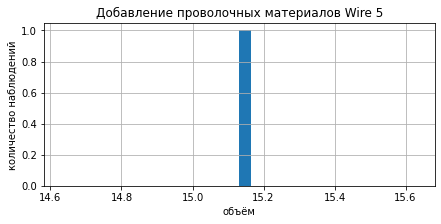

In [45]:
plt.figure(figsize=(7,3))
data_wire_new['Wire 5'].hist(bins=30)
plt.title('Добавление проволочных материалов Wire 5')
plt.xlabel('объём')
plt.ylabel('количество наблюдений');

Посмотрим на диаграммы размаха всех контенеров на одном графике.

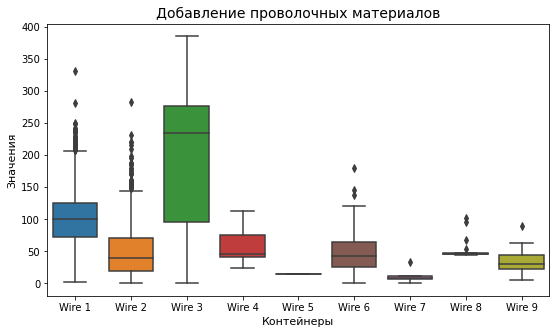

In [46]:
df_wire = pd.DataFrame(data=data_wire_new, columns=["Wire 1", "Wire 2", "Wire 3", "Wire 4","Wire 5",
                                                    "Wire 6", "Wire 7", "Wire 8", "Wire 9"])
plt.figure(figsize=(9, 5))
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_wire))
boxplot.axes.set_title("Добавление проволочных материалов", fontsize=14)
boxplot.set_xlabel("Контейнеры", fontsize=11)
boxplot.set_ylabel("Значения", fontsize=11);

**Промежуточные выводы:**
- в таблице очень много пропусков в каждом столбце. Связываем это с тем, что на данном этапе в данной партии добавление материала не производилось. В будущем заменим эти значения нулями;
- чемпионом по суммарному добавлению проволочных примесей в сталь является 1 этап. За ним расположились 2 и 3 этапы. наименьшее количество примесей добавили на этапе 5;
- количество уникальных ключей 3081.

In [47]:
data_wire_new.sum().sort_values(ascending=False)

key       5.001777e+06
Wire 1    3.082368e+05
Wire 2    5.457293e+04
Wire 3    1.193741e+04
Wire 6    3.505239e+03
Wire 8    1.018879e+03
Wire 9    9.905168e+02
Wire 4    8.041998e+02
Wire 7    1.104291e+02
Wire 5    1.513200e+01
dtype: float64

#### Данные о проволочных материалах (время)

In [48]:
opening(data_wire_time_new)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

#### Результаты измерения температуры

In [49]:
opening(data_temp_new)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None

key                0
Время замера       0
Температура     3427
dtype: int64

Количество уникальных ключей

In [50]:
data_temp_new['key'].nunique()

3216

График значений измерения температуры

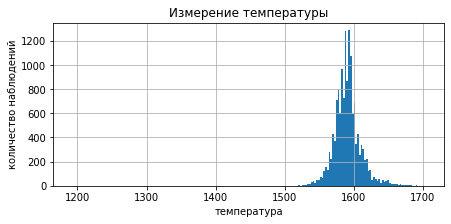

In [51]:
data_temp_new['Температура'].hist(bins=200, figsize=(7,3))
plt.title('Измерение температуры')
plt.xlabel('температура')
plt.ylabel('количество наблюдений');

Построим диаграмму размаха

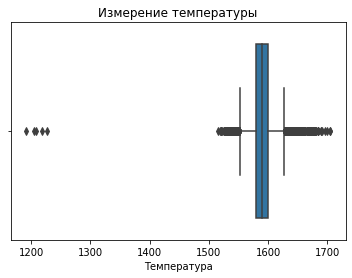

In [52]:
sns.boxplot(x=data_temp_new['Температура'])
plt.title('Измерение температуры');

Вывод десяти наименьших температур

In [53]:
data_temp_new['Температура'].sort_values().head(10)

4883     1191.0
14283    1204.0
6784     1208.0
9050     1218.0
11495    1227.0
11499    1515.0
9359     1519.0
5117     1520.0
2881     1520.0
4889     1521.0
Name: Температура, dtype: float64

**Промежуточные выводы:**
- в столбце со значением температуры есть 3427 пропусков. Это около 19% от общего числа наблюдений. Придётся в будущем данные строки удалить;
- график значений температуры смещен вправо,плюс на диаграмме размаха четко видны выбросы в данных. Найдём их позже;
- Все значения температур расположились в диапазоне от 1520 до 1700 градусов, что соответсвует температуре плавления стали;
- количество уникальных ключей 3216.

### Выводы по разделу:

**1. Электроды:**
- отсутсвуют пропуски значений;
- значения активной мощности находятся в диапазоне от 0.25 до 1.5;
- в столбце с реактивной мощностью обнаружена аномалия с отрицательным значением(-715). Все остальные значения расположились в районе нуля;
- количество уникальных ключей 3214.

**2. Подача сыпучих материалов (объём):**
- в таблице очень много пропусков в каждом столбце. Связываем это с тем, что на данном этапе в данной партии добавление материала не производилось. В будущем заменим эти значения нулями;
- лидером по суммарному добавлению примесей в сталь является 12 этап. За ним расположились 14,15,3 и 4 этапы. Самым скромным можем смело считать этап 8. На данном этапе примеси в сталь почти не вводили;
- количество уникальных ключей 3129.

**3. Продувка сплава газом:**
- отсутсвуют пропуски значений;
- значения продувки расположились в диапазоне от 0 до 30 с пиком в значении 8;
- количество уникальных ключей 3239.

**4. Подача проволочных материалов (объём):**
- в таблице очень много пропусков в каждом столбце. Связываем это с тем, что на данном этапе в данной партии добавление материала не производилось. В будущем заменим эти значения нулями;
- чемпионом по суммарному добавлению проволочных примесей в сталь является 1 этап. За ним расположились 2 и 3 этапы. наименьшее количество примесей добавили на этапе 5;
- количество уникальных ключей 3081.

**5. Результаты измерения температуры:**
- в столбце со значением температуры есть 3427 пропусков. Это около 19% от общего числа наблюдений. Придётся в будущем данные строки удалить;
- график значений температуры смещен вправо,плюс на диаграмме размаха четко видны выбросы в данных. Найдём их позже;
- Все значения температур расположились в диапазоне от 1520 до 1700 градусов, что соответсвует температуре плавления стали;
- количество уникальных ключей 3216.

PS.:Выводы по таблицам  с данными о подаче сыпучих/проволочных материалов со временем не делаем, так как они не информативны и не пригодятся для дальнейшего использования.

## Предобработка данных.

### Предобработка данных для каждого датафрейма по отдельности (удаление аномалиий, заполнение пропусков,генерирация новых признаков,агрегация по ключу).

#### Данные об электродах.

Исследовав данные на предыдущем этапе, мы выяснили, что пропуски значений в данном датафрейме отсутствуют. Есть одна аномалия в столце с реактивной мощностью, значение которой -715.479924. Отрицательной мощности не бывает, поэтому удалим всю партию, где встетилась несуществующая мощность. Определим номер партии, в которой встетилось отрицательное значение, и удалим её.

In [54]:
data_arc_new.sort_values(by='Реактивная мощность').head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924
709,152,2019-05-09 11:26:58,2019-05-09 11:29:41,0.228852,0.153777
3290,711,2019-05-31 07:16:01,2019-05-31 07:20:05,0.242989,0.153921
11794,2567,2019-08-13 05:51:16,2019-08-13 05:52:22,0.288314,0.155221
6130,1336,2019-06-22 15:46:26,2019-06-22 15:47:50,0.244191,0.156525


Номер партии 2116. Посмотрим сколько наблюдений в данной партии.

In [55]:
data_arc_new[data_arc_new['key']==2116]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.787549,0.693881
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.580263,0.411498
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.563641,0.408513


В данной партии 4 замера. Удалим партию.


In [56]:
data_arc_new = data_arc_new[data_arc_new['key']!=2116]

Проверим полученный датафрейм c сортировкой по реактивной мощности.

In [57]:
data_arc_new.sort_values(by='Реактивная мощность').head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
709,152,2019-05-09 11:26:58,2019-05-09 11:29:41,0.228852,0.153777
3290,711,2019-05-31 07:16:01,2019-05-31 07:20:05,0.242989,0.153921
11794,2567,2019-08-13 05:51:16,2019-08-13 05:52:22,0.288314,0.155221
6130,1336,2019-06-22 15:46:26,2019-06-22 15:47:50,0.244191,0.156525
9014,1954,2019-07-21 06:26:02,2019-07-21 06:29:01,0.235934,0.157519


Наименьшее значение теперь положительное и в таблице 14872 значения. Партию с отрицательным значением удалили.

**Сгенерируем новые признаки. Добавим в таблицу 2 столбца:первый с временем нагрева дугой, второй столбец с энергией.**

Время нагрева дугой определяем по формуле: Конец нагрева дугой - Начало нагрева дугой. Не забываем перевести оба столбца в формат datetime.

In [58]:
data_arc_new['warm_time'] =  pd.to_datetime(data_arc_new['Конец нагрева дугой'],
                                               format='%Y-%m-%d %H:%M:%S') -  pd.to_datetime(data_arc_new['Начало нагрева дугой'],
                                                                                         format='%Y-%m-%d %H:%M:%S')
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,warm_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0 days 00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0 days 00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0 days 00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0 days 00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,0 days 00:02:28


Переведём время нагрева в секунды

In [59]:
data_arc_new['warm_time'] = data_arc_new['warm_time'].dt.total_seconds()

**Вычислим затраченную энергию. Сделаем это по следующей формуле: полная мощность(квадратный корень из суммы квадратов активной и рективной мощностей) умноженная на затраченное время. Все эти данные у нас есть в таблице.**

In [60]:
data_arc_new['energy'] = (((data_arc_new['Реактивная мощность'])**2 + (data_arc_new['Активная мощность'])**2)**0.5) * data_arc_new['warm_time']

Посмотрим наш датафрейм

In [61]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,warm_time,energy
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0,84.616003
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0,166.928978
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0,124.276277
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0,234.630603
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0,159.830252


**Далее выполним агрегирование по ключу.В качестве агрегатора выберем среднее для признаков Активная мощность, Реактивная мощность, energy. Для затраченного времени(warm_time) в качестве агрегатора выберем сумму. Соединим все в одну таблицу**

In [62]:
data_arc_x = pd.DataFrame(data_arc_new.groupby('key')['Активная мощность','Реактивная мощность','energy'].mean())
data_arc_y = pd.DataFrame(data_arc_new.groupby('key')['warm_time'].sum())
data_arc_new = pd.concat([data_arc_x,data_arc_y],join="inner",axis=1)  
data_arc_new.head()

,Активная мощность,Реактивная мощность,energy,warm_time
key,,,,
1,0.607346,0.428564,154.056423,1098.0
2,0.534852,0.363339,120.440001,811.0
3,0.812728,0.587491,144.567534,655.0
4,0.676622,0.514248,170.863899,741.0
5,0.563238,0.421998,128.042484,869.0


Переименуем столбцы, выведем информацию.

In [63]:
data_arc_new.columns=['active_power','reactive_power','energy','warm_time']
print(data_arc_new.head())
print()
print(data_arc_new.info())

     active_power  reactive_power      energy  warm_time
key                                                     
1        0.607346        0.428564  154.056423     1098.0
2        0.534852        0.363339  120.440001      811.0
3        0.812728        0.587491  144.567534      655.0
4        0.676622        0.514248  170.863899      741.0
5        0.563238        0.421998  128.042484      869.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 1 to 3241
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   active_power    3213 non-null   float64
 1   reactive_power  3213 non-null   float64
 2   energy          3213 non-null   float64
 3   warm_time       3213 non-null   float64
dtypes: float64(4)
memory usage: 254.5 KB
None


**Промежуточные выводы по разделу:**
- удалили партию 2116, в которой встретилось отрицательное значение реактивной мощности;
- сгенерировали новые признаки. Добавили 2 новых столбца:первый с временем нагрева дугой, второй столбец с энергией;
- агрегировали данные по ключу партии и получили 3213 записи и 4 столбца.

#### Данные о подаче сыпучих материалов (объём).

Для начала посмотрим сколько наблюдений у нас по каждому контейнеру.

In [64]:
data_bulk_new.count().sort_values(ascending=False)

key        3129
Bulk 14    2806
Bulk 12    2450
Bulk 15    2248
Bulk 3     1298
Bulk 4     1014
Bulk 6      576
Bulk 1      252
Bulk 11     177
Bulk 10     176
Bulk 5       77
Bulk 7       25
Bulk 2       22
Bulk 9       19
Bulk 13      18
Bulk 8        1
dtype: int64

Контейнер с номером 8 отличился только одним значением, значит ценности для модели он не несет. Удалим этот признак.

In [65]:
data_bulk_new = data_bulk_new.drop(columns='Bulk 8', axis=1)

В пункте исследование данных мы делали акцент на том, что все пропущенные значения NaN нужно заменить нулями. Заменим и посмотрим на обновленный датафрейм.

In [66]:
data_bulk_new = data_bulk_new.fillna(0)


**В данном датафрейме ключи не повторяются и имеют только один уникальный номер. Агрегировать по ключу здесь не нужно.**

Проверим датафрейм на пропуски.

In [67]:
data_bulk_new.isna().sum()

key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64

Установим столбец key в качестве индекса и выведем полученный датафрейм.

In [68]:
data_bulk_new = data_bulk_new.set_index('key')
print(data_bulk_new.head())
print()
print(data_bulk_new.info())

     Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 9  Bulk 10  \
key                                                                            
1       0.0     0.0     0.0    43.0     0.0     0.0     0.0     0.0      0.0   
2       0.0     0.0     0.0    73.0     0.0     0.0     0.0     0.0      0.0   
3       0.0     0.0     0.0    34.0     0.0     0.0     0.0     0.0      0.0   
4       0.0     0.0     0.0    81.0     0.0     0.0     0.0     0.0      0.0   
5       0.0     0.0     0.0    78.0     0.0     0.0     0.0     0.0      0.0   

     Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
key                                               
1        0.0    206.0      0.0    150.0    154.0  
2        0.0    206.0      0.0    149.0    154.0  
3        0.0    205.0      0.0    152.0    153.0  
4        0.0    207.0      0.0    153.0    154.0  
5        0.0    203.0      0.0    151.0    152.0  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3241
Data co

**Промежуточные выводы по разделу:**
- Выяснили, что контейнер с номером 8 отличился только одним значением. Удалили этот признак, так как никакой ценности для модели он не несет;
- все пропуски значений заполнили нулями, так как сделали вывод, что на том или ином этапе в определенной партии добавление материала не производилось;
- получили 3129 записи и 14 столбцов.

####  Данные о продувке сплава газом.

Проверим датафрейм на наличие выбросов

In [69]:
data_gas_new['Газ 1'].sort_values()

863      0.008399
1044     0.016696
2100     0.263029
2353     0.275081
352      0.325733
          ...    
116     50.581035
2567    51.380229
2107    52.142373
277     60.935689
319     77.995040
Name: Газ 1, Length: 3239, dtype: float64

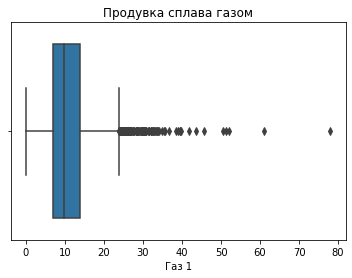

In [70]:
sns.boxplot(x=data_gas_new['Газ 1'])
plt.title('Продувка сплава газом');

Выбросов не обнаружил.

Переименуем столбцы и назначим столбец key в качестве индекса. Выведем информацию 

In [71]:
data_gas_new.columns = ['key', 'gas']
data_gas_new = data_gas_new.set_index('key')
print(data_gas_new.head())
print()
print(data_gas_new.info())

           gas
key           
1    29.749986
2    12.555561
3    28.554793
4    18.841219
5     5.413692

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gas     3239 non-null   float64
dtypes: float64(1)
memory usage: 50.6 KB
None


**Промежуточные выводы по разделу:**
- привели название столбца с газом к "хорошему тону";
- получили 3239 записей и 1 столбец.

#### Данные о проволочных материалах (объём).

По аналогии с таблицей с сыпучими материалами проведем предобоработку. Проверим и удалим контейнеры, которые не несут ценности для модели. А так же заменим все пропуски значений нулями.

In [72]:
data_wire_new.count().sort_values(ascending=False)

key       3081
Wire 1    3055
Wire 2    1079
Wire 6      73
Wire 3      63
Wire 9      29
Wire 8      19
Wire 4      14
Wire 7      11
Wire 5       1
dtype: int64

Удалим 5-ый контейнер.

In [73]:
data_wire_new = data_wire_new.drop(columns='Wire 5', axis=1)

Заменим пропуски нулями и выведем полученный датафрейм

In [74]:
data_wire_new = data_wire_new.fillna(0)
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0


Проверим данные на пропуски.

In [75]:
data_wire_new.isna().sum()

key       0
Wire 1    0
Wire 2    0
Wire 3    0
Wire 4    0
Wire 6    0
Wire 7    0
Wire 8    0
Wire 9    0
dtype: int64

Назначим столбец key в качестве индекса.

In [76]:
data_wire_new = data_wire_new.set_index('key')
print(data_wire_new.head())
print()
print(data_wire_new.info())

        Wire 1   Wire 2  Wire 3  Wire 4  Wire 6  Wire 7  Wire 8  Wire 9
key                                                                    
1    60.059998  0.00000     0.0     0.0     0.0     0.0     0.0     0.0
2    96.052315  0.00000     0.0     0.0     0.0     0.0     0.0     0.0
3    91.160157  0.00000     0.0     0.0     0.0     0.0     0.0     0.0
4    89.063515  0.00000     0.0     0.0     0.0     0.0     0.0     0.0
5    89.238236  9.11456     0.0     0.0     0.0     0.0     0.0     0.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 1 to 3241
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wire 1  3081 non-null   float64
 1   Wire 2  3081 non-null   float64
 2   Wire 3  3081 non-null   float64
 3   Wire 4  3081 non-null   float64
 4   Wire 6  3081 non-null   float64
 5   Wire 7  3081 non-null   float64
 6   Wire 8  3081 non-null   float64
 7   Wire 9  3081 non-null   float64
dtypes: float64(8)


**Промежуточные выводы по разделу:**
- выяснили, что контейнер с номером 5 отличился только одним значением. Удалили этот признак, так как никакой ценности для модели он не несет;
- все пропуски значений заполнили нулями, так как сделали вывод, что на том или ином этапе в определенной партии добавление материала не производилось;
- получили 3081 записи и 8 столбцов.

#### Результаты измерения температуры.

Для начала проверим данные на наличие пропусков

In [77]:
data_temp_new.isna().sum()

key                0
Время замера       0
Температура     3427
dtype: int64

В столбце с температурой 3427 пропусков. Теперь нужно определить, в каких партиях встечаются пропуски. Выведем список всех партий.

In [78]:
parties_with_nan = data_temp_new.loc[data_temp_new['Температура'].isna(), 'key']
parties_with_nan.unique()

array([2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510,
       2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521,
       2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532,
       2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543,
       2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554,
       2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565,
       2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576,
       2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587,
       2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598,
       2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609,
       2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620,
       2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631,
       2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642,
       2643, 2644, 2645, 2646, 2647, 2648, 2649, 26

По полученному массиву видно, что пропущенные значения встречаются с 2500-ой партии по 3241. Оставим все партии до 2500.

In [79]:
data_temp_new = data_temp_new[data_temp_new['key']<2500]

In [80]:
data_temp_new.tail()

,key,Время замера,Температура
13921,2499,2019-08-10 13:33:21,1569.0
13922,2499,2019-08-10 13:41:34,1604.0
13923,2499,2019-08-10 13:46:28,1593.0
13924,2499,2019-08-10 13:54:56,1588.0
13925,2499,2019-08-10 13:58:58,1603.0


Партии с пропущенными значениями исключили.

В исследовательском анализе мы пришли к выводу, что в данных есть выбросы. Там же на графике размаха их четко видно. Взглянем на этот график еще раз.

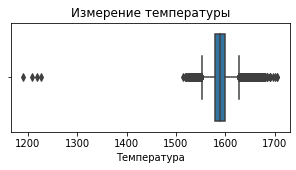

In [81]:
plt.figure(figsize=(5,2))
sns.boxplot(x=data_temp_new['Температура'])
plt.title('Измерение температуры');

Температура плавления стали начинается от 1450 градусов цельсия. Удалим все партии, в которые входят температуры ниже порога в 1450 градусов. Определим эти партии.

In [82]:
data_temp_new.sort_values(by='Температура').head()

,key,Время замера,Температура
4883,867,2019-06-06 08:03:39,1191.0
6784,1214,2019-06-18 08:01:03,1208.0
9050,1619,2019-07-03 02:34:41,1218.0
11495,2052,2019-07-25 08:49:15,1227.0
11499,2052,2019-07-25 09:20:11,1515.0


Партии 867,1214,1619 и 2052 удаляем.

In [83]:
data_temp_new = data_temp_new[(data_temp_new['key']!=876) & (data_temp_new['key']!=1214)& (data_temp_new['key']!=1619)& (data_temp_new['key']!=2052)]

Посчитаем данные по ключу.Так мы проверим, есть ли в данных строки с одним замером.

In [84]:
data_temp_new.groupby('key').count().sort_values(by='Температура').head()

,Время замера,Температура
key,,
279,1,1
195,1,1
614,2,2
1268,2,2
1974,2,2


В партиях 279 и 195 по одному замеру.Это означает, что у партии нет конечной температуры, есть только начальная.Данные партии нам не подходят для обучения модели.Удаляем их.

In [85]:
data_temp_new = data_temp_new[(data_temp_new['key']!=279) & (data_temp_new['key']!=195)]

Проверим данные

In [86]:
data_temp_new.groupby('key').count().sort_values(by='Температура').head()

,Время замера,Температура
key,,
530,2,2
977,2,2
943,2,2
2112,2,2
661,2,2


Во всех данных минимум по 2 замера в каждом.

**Целевым признаком в нашем проекте будет последняя температура в каждой партии. Первую же температуру можно использовать как один из признаков. Вытащим первую и последнюю температуру в отдельную таблицу и сразу сгенериурем по ключу.**

In [87]:
first_temp = data_temp_new.groupby('key').first()
first_temp.columns = ['first_time','first_temp']

last_temp = data_temp_new.groupby('key').last()
last_temp.columns = ['last_time','last_temp']

temp_first_last = first_temp.merge(last_temp, on='key',how='inner')
print(temp_first_last.head())
print()
print(temp_first_last.info())

              first_time  first_temp            last_time  last_temp
key                                                                 
1    2019-05-03 11:02:04      1571.0  2019-05-03 11:30:38     1613.0
2    2019-05-03 11:34:04      1581.0  2019-05-03 11:55:09     1602.0
3    2019-05-03 12:06:44      1596.0  2019-05-03 12:35:57     1599.0
4    2019-05-03 12:39:27      1601.0  2019-05-03 12:59:47     1625.0
5    2019-05-03 13:11:03      1576.0  2019-05-03 13:36:39     1602.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 1 to 2499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_time  2471 non-null   object 
 1   first_temp  2471 non-null   float64
 2   last_time   2471 non-null   object 
 3   last_temp   2471 non-null   float64
dtypes: float64(2), object(2)
memory usage: 96.5+ KB
None


**last_temp теперь у нас -целевой признак, который нужно предсказать. first_temp добавим,как один из признаков, на которых будем обучать модель.**

**Промежуточные выводы по разделу:**
- обнаружили партии, в которых встретились 3427 пропуска.Так получилось. что номера партий, в которых были пропуски начинались с 2500 до 3241. Удалили данные партии;
- нашли и удалили партии, в которых встретились аномалии.Это температуры, которые ниже 1450 градусов цельсия, что соответствует нижней границе температры плавления стали;
- в партиях 279 и 195 заметили по одному замеру.Это означает, что у партии нет конечной температуры, есть только начальная. Данные партии удалили, так как они нам не подходят;
- агрегировали данные по ключу с добавлением двух новых столбцов-первой и последней температуры в каждой партии.Сделали это для того, чтобы отделить целевой признак(последняя температура в партии) и добавить новый признак для обучения модели(первая температура в партии);
- получили 2471 запись и 4 столбца.

### Объединение всех таблиц в итоговый датафрейм.

**Объединим все обработанные данный в итоговый датафрейм.**

In [88]:
data = data_arc_new.merge(data_bulk_new, on='key', how='inner')
data = data.merge(data_gas_new, on='key', how='inner')
data = data.merge(data_wire_new, on='key', how='inner')
data = data.merge(temp_first_last, on='key', how='inner')

In [89]:
print(data.head())
print()
print(data.info())

     active_power  reactive_power      energy  warm_time  Bulk 1  Bulk 2  \
key                                                                        
1        0.607346        0.428564  154.056423     1098.0     0.0     0.0   
2        0.534852        0.363339  120.440001      811.0     0.0     0.0   
3        0.812728        0.587491  144.567534      655.0     0.0     0.0   
4        0.676622        0.514248  170.863899      741.0     0.0     0.0   
5        0.563238        0.421998  128.042484      869.0     0.0     0.0   

     Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 9  Bulk 10  Bulk 11  \
key                                                                     
1       0.0    43.0     0.0     0.0     0.0     0.0      0.0      0.0   
2       0.0    73.0     0.0     0.0     0.0     0.0      0.0      0.0   
3       0.0    34.0     0.0     0.0     0.0     0.0      0.0      0.0   
4       0.0    81.0     0.0     0.0     0.0     0.0      0.0      0.0   
5       0.0    78.0     0.0  

После объединения в общей таблице получилось 2322 записи и 31 признак. Не все признаки нужны для обучения модели. 

Удалим столбцы, которые не потребуются нам для обучения модели. Это active_power и reactive_power,столбцы с датой и временем(first_time,last_time).

In [90]:
data = data.drop(columns=['active_power','reactive_power','first_time','last_time'],axis=1)
print(data.head())
print()
print(data.info())

         energy  warm_time  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  \
key                                                                          
1    154.056423     1098.0     0.0     0.0     0.0    43.0     0.0     0.0   
2    120.440001      811.0     0.0     0.0     0.0    73.0     0.0     0.0   
3    144.567534      655.0     0.0     0.0     0.0    34.0     0.0     0.0   
4    170.863899      741.0     0.0     0.0     0.0    81.0     0.0     0.0   
5    128.042484      869.0     0.0     0.0     0.0    78.0     0.0     0.0   

     Bulk 7  Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  \
key                                                                         
1       0.0     0.0      0.0      0.0    206.0      0.0    150.0    154.0   
2       0.0     0.0      0.0      0.0    206.0      0.0    149.0    154.0   
3       0.0     0.0      0.0      0.0    205.0      0.0    152.0    153.0   
4       0.0     0.0      0.0      0.0    207.0      0.0    153.0    

### Выводы по разделу:

#### По необходимости для каждого датафрейма провели предобработку данных(удалили аномалиий, заполнили пропуски,сгенерировали новые признаки,выполнили агрегацию по ключу)

**1. Электроды:**
- удалили партию 2116, в которой встретилось отрицательное значение реактивной мощности;
- сгенерировали новые признаки. Добавили 2 новых столбца:первый с временем нагрева дугой, второй столбец с энергией;
- агрегировали данные по ключу партии и получили 3213 записи и 4 столбца.

**2. Подача сыпучих материалов (объём):**
- Выяснили, что контейнер с номером 8 отличился только одним значением. Удалили этот признак, так как никакой ценности для модели он не несет;
- все пропуски значений заполнили нулями, так как сделали вывод, что на том или ином этапе в определенной партии добавление материала не производилось;
- получили 3129 записи и 14 столбцов.

**3. Продувка сплава газом:**
- привели название столбца с газом к "хорошему тону";
- получили 3239 записей и 1 столбец.

**4. Подача проволочных материалов (объём):**
- выяснили, что контейнер с номером 5 отличился только одним значением. Удалили этот признак, так как никакой ценности для модели он не несет;
- все пропуски значений заполнили нулями, так как сделали вывод, что на том или ином этапе в определенной партии добавление материала не производилось;
- получили 3081 записи и 8 столбцов.

**5. Результаты измерения температуры:**
- обнаружили партии, в которых встретились 3427 пропуска.Так получилось. что номера партий, в которых были пропуски начинались с 2500 до 3241. Удалили данные партии;
- нашли и удалили партии, в которых встретились аномалии.Это температуры, которые ниже 1450 градусов цельсия, что соответствует нижней границе температры плавления стали;
- в партиях 279 и 195 заметили по одному замеру.Это означает, что у партии нет конечной температуры, есть только начальная. Данные партии удалили, так как они нам не подходят;
- агрегировали данные по ключу с добавлением двух новых столбцов-первой и последней температуры в каждой партии.Сделали это для того, чтобы отделить целевой признак(последняя температура в партии) и добавить новый признак для обучения модели(первая температура в партии);
- получили 2471 запись и 4 столбца.

#### Выполнили объединение всех таблиц в один общий датафрейм и сотавили в нём только те признаки, которые посчитали более информативными для обучения моделей.

PS.:Таблицы с данными о подаче сыпучих/проволочных материалов в итоговую не включали, так как посчитали, что они не информативны и не пригодятся для обучения моделей.

## Исследование объединённого датафрейма.

### Проведем исследовательский анализ данных.

Выведем несколько строк.

In [91]:
data.head()

,energy,warm_time,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9,first_temp,last_temp
key,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,154.056423,1098.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1571.0,1613.0
2,120.440001,811.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1581.0,1602.0
3,144.567534,655.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1596.0,1599.0
4,170.863899,741.0,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1601.0,1625.0
5,128.042484,869.0,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,1602.0


**Все признаки на месте, key в индексе, наименования столбцом приведены к единому формату.**

Взглянем на описательные статистики

In [92]:
data.describe()

,energy,warm_time,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,gas,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,Wire 9,first_temp,last_temp
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,142.452157,808.276678,3.435026,1.425559,47.397160,37.347676,2.645869,22.419535,2.009036,0.445783,5.063683,4.254303,208.686317,1.069707,154.003012,120.123064,11.380082,102.418785,17.615756,3.241876,0.307209,0.980926,0.006374,0.311981,0.317795,1587.204389,1593.376076
std,47.545175,340.829747,12.424463,19.102530,75.369517,58.677890,22.426054,55.792509,30.709089,6.227298,20.938984,22.538843,157.052478,14.250280,81.351453,84.619944,6.396779,43.533684,33.649273,27.972523,4.762842,8.702531,0.205926,4.407419,3.460248,25.015569,11.207957
min,25.227273,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1191.000000,1541.000000
25%,109.041860,581.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,105.000000,0.000000,7.282534,73.204559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1571.000000,1587.000000
50%,136.265215,778.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.000000,107.000000,10.103073,101.103600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1587.000000,1593.000000
75%,170.600050,993.000000,0.000000,0.000000,80.000000,77.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,283.000000,0.000000,204.000000,204.000000,14.218487,128.075222,23.102560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1603.000000,1598.000000
max,436.387492,4189.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000,77.995040,330.314424,282.780152,385.008668,113.231044,180.454575,8.490040,102.762401,62.025600,1660.000000,1653.000000


**Видим наглядную статистику по каждому признаку. Можем отметить для себя минимальные и максимальные значения в каждом столбце, найти среднее, медиану,0.25 и 0.75 квартили.**

Получим общую информацию об итоговом датафрейме.

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 1 to 2499
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   energy      2324 non-null   float64
 1   warm_time   2324 non-null   float64
 2   Bulk 1      2324 non-null   float64
 3   Bulk 2      2324 non-null   float64
 4   Bulk 3      2324 non-null   float64
 5   Bulk 4      2324 non-null   float64
 6   Bulk 5      2324 non-null   float64
 7   Bulk 6      2324 non-null   float64
 8   Bulk 7      2324 non-null   float64
 9   Bulk 9      2324 non-null   float64
 10  Bulk 10     2324 non-null   float64
 11  Bulk 11     2324 non-null   float64
 12  Bulk 12     2324 non-null   float64
 13  Bulk 13     2324 non-null   float64
 14  Bulk 14     2324 non-null   float64
 15  Bulk 15     2324 non-null   float64
 16  gas         2324 non-null   float64
 17  Wire 1      2324 non-null   float64
 18  Wire 2      2324 non-null   float64
 19  Wire 3      2324 non-null  

**Фиксируем наличие 2324 сток и 27 столбцов. Номера ключей в диапазоне от 1 до 2499. Типы данных у всех числовые float64, пропусков не обнаружено.**

Визуализируем распределение признаков.

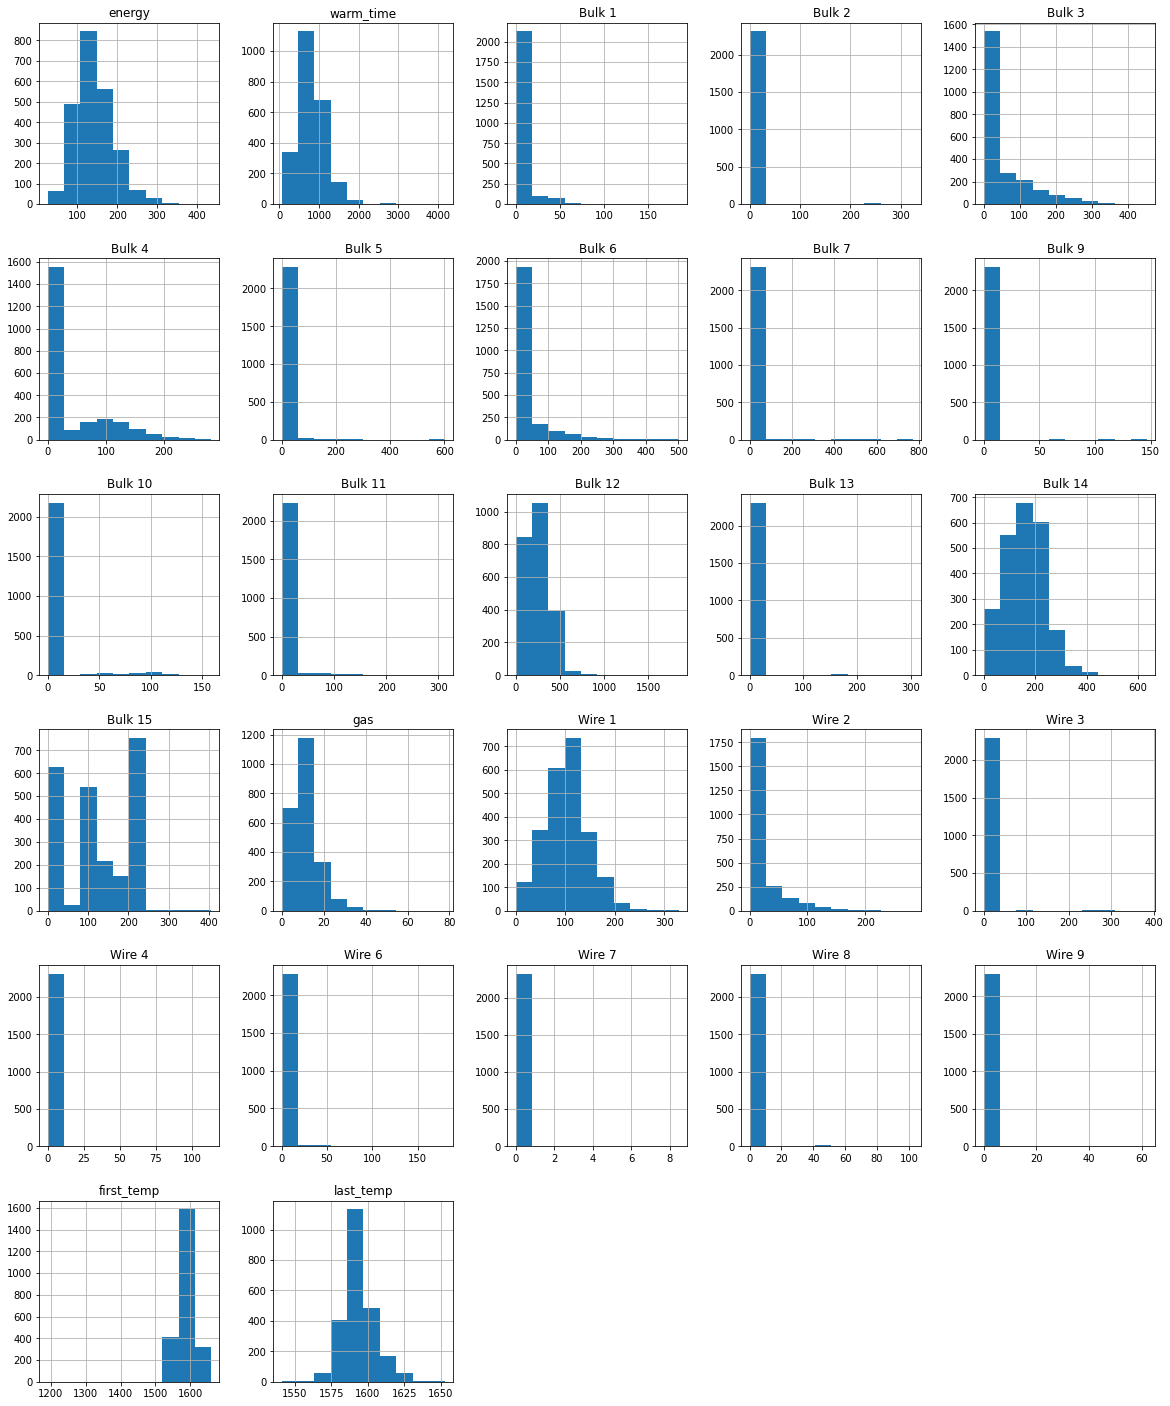

In [94]:
data.hist(figsize=(20,25));

**На графиках можно увидеть, как распределены данные по каждому признаку. Так например данные в столбце energy имеют нормальное распределение.**

### Корреляция признаков.

**Создадим тепловую карту (heatmap) на основе корреляционной матрицы данных итоговой таблицы. Сделаем это для того, чтобы посмотреть, как признаки коррелируют(зависят друг от друга) между собой.** 

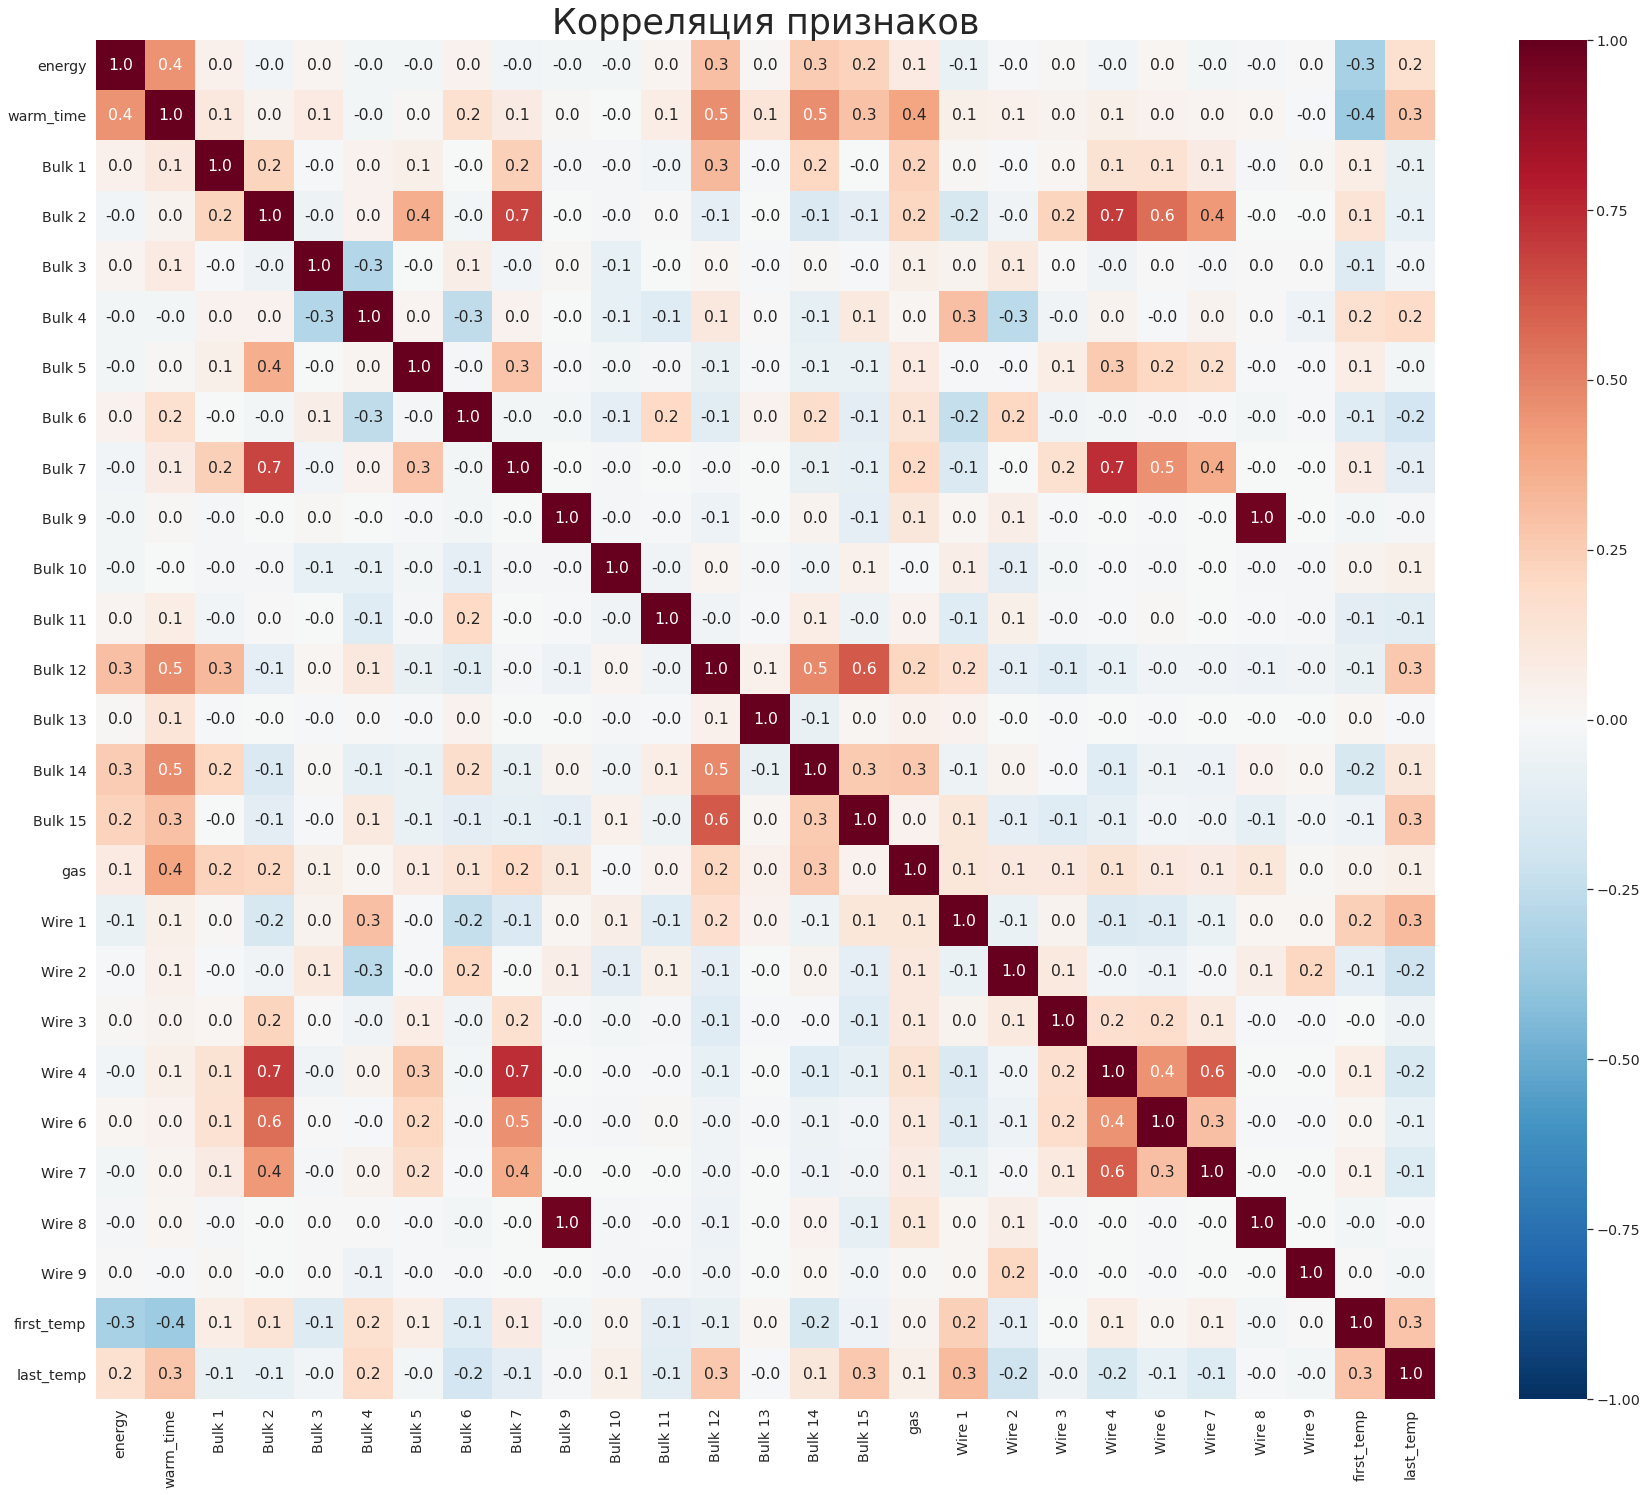

In [95]:
sns.set(font_scale=1.3)
plt.figure(figsize=(30,25))
sns.heatmap(
    data.corr(), 
    cmap='RdBu_r',
    annot=True, 
    vmin=-1, vmax=1,fmt='.1f')
plt.title("Корреляция признаков",fontsize=35);

Мы обнаружили, что признаки Wire 8 и Bulk 9 сильно коррелируют между собой. Данный факт может привести к проблеме мультиколлинеарности. Мультиколлинеарность может негативно влиять на производительность модели, так как увеличивает неопределенность вклада каждого признака в прогноз. Исходя из этого нужно один из этих признаков удалить.

In [96]:
data = data.drop(columns=['Bulk 9'],axis=1)

Посмотрим на итоговую таблицу и выведем информацию о ней.

In [97]:
print(data.head())
print()
print(data.info())

         energy  warm_time  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  \
key                                                                          
1    154.056423     1098.0     0.0     0.0     0.0    43.0     0.0     0.0   
2    120.440001      811.0     0.0     0.0     0.0    73.0     0.0     0.0   
3    144.567534      655.0     0.0     0.0     0.0    34.0     0.0     0.0   
4    170.863899      741.0     0.0     0.0     0.0    81.0     0.0     0.0   
5    128.042484      869.0     0.0     0.0     0.0    78.0     0.0     0.0   

     Bulk 7  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15        gas  \
key                                                                            
1       0.0      0.0      0.0    206.0      0.0    150.0    154.0  29.749986   
2       0.0      0.0      0.0    206.0      0.0    149.0    154.0  12.555561   
3       0.0      0.0      0.0    205.0      0.0    152.0    153.0  28.554793   
4       0.0      0.0      0.0    207.0      0.0    15

### Выводы по разделу:

**На данном этапе мы провели полное исследование итогового датафрейма. Вывели описательные статистики,проверили типы данных признаков, исключили наличие пропусков, визуализировали распределение признаков.Так же провели исследование итогового датафрейма на предмет зависимости признаков друг от друга. Вывели на экран тепловую карту на основе корреляционной матрицы данных. Выяснили, что 2 признака(Wire 8 и Bulk 9) сильно коррелируют между собой. Удалили признак Bulk 9, чтобы избежать мультиколлинеарности данных, так как некоторые алгоритмы машинного обучения, особенно линейные модели, могут быть чувствительными к мультиколлинеарности.**

## Подготовка полученного датафрейма к обучению.

### Разделение на выборки.

Разделим данные на обучающую и тестовую выборки в соотношении 75:25. Псевдослучайность зафиксируем random_state=310723


In [98]:
data_train, data_test = train_test_split(
    data, test_size=0.25, random_state=310723)

Разделим выборки на признаки(все столбцы кроме last_temp) и целевой признак(столбец last_temp) и посмотрим на количество строк в каждой.

In [99]:
features_train = data_train.drop(['last_temp'],axis=1)
target_train = data_train['last_temp']
features_test = data_test.drop(['last_temp'],axis=1)
target_test = data_test['last_temp']

features_train.shape[0], features_test.shape[0]

(1743, 581)

**Стандартизируем(приведем к одному масштабу) данные в тренировочной выборке при помощи pipeline. Так же сразу добавим в pipeline объект линейной регрессии.**

Создадим объекты для линейной регрессии и масштабирования данных.

In [100]:
scaler = StandardScaler()
regressor = LinearRegression()

Создадим объект pipeline, в котором объединим объекты масштабирования и регрессии

In [101]:
pipeline = Pipeline([('scaler', scaler), ('regressor', regressor)])

Обучение и получение значения метрики выведем в следующем пункте.

### Выводы по разделу:

**На данном этапе мы выполнили подготовку данных для обучения моделей, а именно:**
- разделили итоговый датасет на обучающую и тестовую выборки в соотношении 75%:25%. В тренировочной осталось 1741 строка,в тестовой-581;
- в каждой выборке определили признаки и целевой признак;
- создали объект pipeline, в котором объединили масштабирование и линейную регрессию.

## Подбор и обучение различных моделей машинного обучения. Выбор лучшей модели.

**Применим к нашим данным несколько моделей машинного обучения и выберем ту, которая покажет наиболее низкий результат mae. Чем mae ниже, тем точнее модель. Рассмотрим три популярные модели:**

- Линейная регрессия.
- Случайный лес.
- CatBoostRegressor

Для поиска гиперпараметров воспользуемся GridSearchCV() и RandomizedSearchCV. Это инструменты для автоматического подбора параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров.На вход передадим модель, её гиперпараметры, кросс-валидацию(cv) равную 3 и вычислим необходимую метрику.

### Линейная регрессия.

In [102]:
%%time

pipeline.fit(features_train, target_train)
mae_lin = cross_val_score(pipeline,features_train,target_train,scoring='neg_mean_absolute_error',cv=3).mean()
print('MAE для линейной регрессии:', -mae_lin)

MAE для линейной регрессии: 6.510486278405698
CPU times: user 263 ms, sys: 353 ms, total: 616 ms
Wall time: 607 ms


Неплохой результат метрики показала линейная регрессия-6,51. 

### Случайный лес.

In [103]:
%%time

model_ran = RandomForestRegressor(random_state=310723)
param_grid_ran = { 
    'n_estimators': [50, 100, 200, 500],
    'max_depth' : [4,5,6,7,8]
}

grid_ran = GridSearchCV(model_ran,param_grid_ran, scoring='neg_mean_absolute_error',cv=3)
grid_ran.fit(features_train, target_train)
print('Лучшее MAE для случайного леса:',-grid_ran.best_score_, 'с гиперпараметрами:', grid_ran.best_params_)

Лучшее MAE для случайного леса: 6.492446214281569 с гиперпараметрами: {'max_depth': 8, 'n_estimators': 200}
CPU times: user 57.1 s, sys: 469 ms, total: 57.6 s
Wall time: 1min


Случайный лес отработал дольше линейной регрессии, но показал результат mae лучше-6,49.

### CatBoost.

In [104]:
%%time

model_cat = CatBoostRegressor()
params_grid_cat = {'learning_rate': [0.05, 0.1],
                   'depth': [4, 6, 10]
                  }
grid_cat = RandomizedSearchCV(model_cat, params_grid_cat, scoring='neg_mean_absolute_error', cv=3)
grid_cat.fit(features_train, target_train, verbose=200)
print('Лучшее MAE для CatBostRegressor:',-grid_cat.best_score_, 'с гиперпараметрами:', grid_cat.best_params_)

0:	learn: 11.3919393	total: 48.9ms	remaining: 48.8s
200:	learn: 7.0785654	total: 307ms	remaining: 1.22s
400:	learn: 6.1499728	total: 550ms	remaining: 822ms
600:	learn: 5.5454904	total: 818ms	remaining: 543ms
800:	learn: 5.0274312	total: 1.06s	remaining: 264ms
999:	learn: 4.5935756	total: 1.32s	remaining: 0us
0:	learn: 11.0164067	total: 1.44ms	remaining: 1.44s
200:	learn: 7.1071350	total: 265ms	remaining: 1.05s
400:	learn: 6.2192387	total: 526ms	remaining: 786ms
600:	learn: 5.5416989	total: 790ms	remaining: 525ms
800:	learn: 5.0272891	total: 1.07s	remaining: 265ms
999:	learn: 4.5827698	total: 1.32s	remaining: 0us
0:	learn: 11.4294023	total: 1.66ms	remaining: 1.66s
200:	learn: 7.2330717	total: 280ms	remaining: 1.11s
400:	learn: 6.2321667	total: 536ms	remaining: 801ms
600:	learn: 5.5299218	total: 805ms	remaining: 534ms
800:	learn: 4.9824865	total: 1.07s	remaining: 266ms
999:	learn: 4.5821917	total: 1.33s	remaining: 0us
0:	learn: 11.2766828	total: 2.19ms	remaining: 2.19s
200:	learn: 6.1406

CatBoost стал чемпионом по качеству модели, так как показал наилучший результат метрики mae c показателем 6,40. Отработал дольше остальных, но не критично. 

Сведём все результаты метрик рассмотренных модлей в одну таблицу для наглядности

In [105]:
index = ['LinearRegression',
         'RandomForestRegressor',
         'CatBoostRegressor']
data = {'MAE модели':[-mae_lin,
                       -grid_ran.best_score_,
                       -grid_cat.best_score_]
       }

data_new = pd.DataFrame(data=data, index=index)
data_new

,MAE модели
LinearRegression,6.510486
RandomForestRegressor,6.492446
CatBoostRegressor,6.408581


### Выводы по разделу:

Исходя из проделанной работы в данном разделе можно сделать следующие выводы:
- модель линейной регрессии показывает наихудший результат по метрике MAE  и первый результат по времени обучения модели. 
- модель случайного леса показала хороший результат в определении метрики качества MАE-6,49. По скорости обучения тоже расположилась на втором месте.
- модель CatBoost выигрывает у обеих моделей по качеству с результатом MAE-6,40, но проигрывает по времени обучения.

**Опираясь на полученные результаты, можно утверждать, что в противостоянии моделей побеждает CatBoost. Именно модель градиентного бустинга CatBoost я рекомендую к использованию.**

## Тестирование модели-победителя.

Проверим выбранную модель на тестовых данных. Посмотрим какие результаты она продемонстрирует.

In [106]:
predict = grid_cat.predict(features_test)
result = mean_absolute_error(target_test, predict)
print(result)

5.881988196986122


### Выводы по разделу:

**Качество предсказаний модели CatBoost на тестовых данных даже улучшилось до 5,88. Отличный результат.**

## Исследование важности признаков модели-победителя.

Получим важность признаков. уже обученную модель достанем из атрибута best_estimator_ объекта grid_cat.

In [107]:
feature_importance = grid_cat.best_estimator_.get_feature_importance()

Создадим датафрейм с важность признаков и отсортируем его по убыванию

In [108]:
importance_data = pd.DataFrame({"Признаки": features_train.columns, "Важность": feature_importance})
importance_data = importance_data.sort_values(by="Важность", ascending=False)
importance_data

,Признаки,Важность
24,first_temp,23.859846
1,warm_time,21.233399
16,Wire 1,8.031567
0,energy,7.160328
7,Bulk 6,5.455046
15,gas,5.353395
17,Wire 2,4.370762
14,Bulk 15,4.239724
13,Bulk 14,3.375512
11,Bulk 12,3.151162


Визуализируем полученный датафрейм

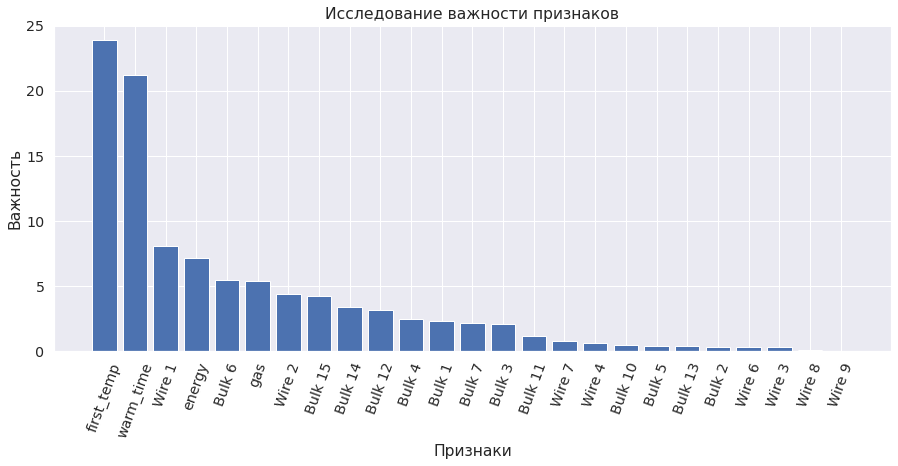

In [109]:
plt.figure(figsize=(15, 6))
plt.bar(importance_data["Признаки"], importance_data["Важность"])
plt.xticks(rotation=70)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.title("Исследование важности признаков")
plt.show()

### Выводы по разделу:

**По графику наглядно видно, что наиболее важными признаками для модели являются сгенерированные первая температура(first_temp) и время нагрева(warm_time). Меньше всех на качество модели повлияли контейнеры Wire 8 и  Wire 9.**

## Проверка модели на адекватность(сравнение с константной моделью).

Сравним mae лучшей модели с результатом константной модели. Возьмем DummyRegressor.

In [110]:
dummy = DummyRegressor(strategy="median")
dummy.fit(features_train,target_train)
dummy_predict = dummy.predict(features_test)
dummy_mae_test = mean_absolute_error(target_test, dummy_predict)
print('MAE константной модели:', dummy_mae_test)

MAE константной модели: 7.714285714285714


### Выводы по разделу:

**Дамми, который генерирует случайные прогнозы,имеет худшее качество чем CatBoost(6,40 против 7,71). Делаем вывод, что наша модель адекватна.**

## Отчёт.

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Перед нами стояла задача, построить модель, которая предскажет температуру стали. 

Для оптимизации и быстрой навигации по проекту был составлен план, который пошагово описывал весь процесс решения задачи. Было решено действовать чётко по плану, без каких-либо отклонений. И нам это удалось. Мы реализовали все пункты, которые отметили для себя в начале проекта.

По мере выполнения задания у нас возникли следующие трудности, которые приходилось решать:
- для улучшения качества предсказания модели мы **создавали дополнительные признаки.** Одним из созданных признаков была **полная энергия**, которая вырабатывалась в процессе нагрева стали. Каждая партия была разбита на несколько наблюдений, и чтобы просчитать общую энергию, нужно было агрегировать каждое значение в партии по сумме. В результате суммирования получился признак, который **сильно коррелировал** с другим созданным нами признаком-**временем нагрева** стали. Мультиколлинеарность вредит предсказанию моделей, значит один из созданных признаков нужно было либо удалить, либо изменить. Мною было принято решение, изменить расчёт энергии, агрегировав её **не по сумме, а по среднему**. Так мне удалось избежать мультиколлинеарности.
- для обучения модели линейной регрессии было решено сделать масштабирование данных тренировочной выборки. После масштабирования и передачи данных в модель **произошла утечка данных**, и искомая метрика MAE показывала аномально низкие значения. Решением данной проблемы было **создание объекта Pipeline**, в который я поместил регрессию и масштабирование. Благодаря данному шагу была решена проблема утечки данных.


Исходные данные проекта состояли из нескольких датафреймов, которые нуждались в предобработке. Почти во всех были обнаружены пропуски значений, в некоторых были аномалии. Так, например, в таблице с электродами было обнаружено отрицательное значение реактивной мощности -715.47. В природе не существует отрицательной мощности, поэтому партию, в которой попалось данное значение, пришлось удалить. В данных с сыпучими и проволочными материалами, которые добавляют в сталь, удалил партии с одним замером. Такого рода партии нам не подходят, так как ценности для модели они не несут. Большое количество пропущенных значений в данных с сыпучими и проволочными материалами связали с тем фактом, что они просто не добавлялись в сплав. Исходя из этого было решено заменить данные пропуски нулями. Аномалии были обнаружены и в датафрейме с температурой. Встретились значения, которые были ниже температуры плавления стали (1450 градусов Цельсия). Все партии с аномальными температурами отсёк.В данном датафрейме было около 19% пропусков от всего числа. Это достаточно большая доля, для того чтобы её можно было удалить. Но заполнить пропуски в данном случае не представлялось возможным. Пришлось пожертвовать 19% данных. 

Изначально в проекте не было целевого признака. Его нужно было достать из столбца с изменением температуры. **Последнее значение в каждой партии-это целевой признак**, который должна в будущем предсказывать модель. Взяв таблицу с температурой, я вытащил последнюю и первую температуру каждой партии. Последняя стала целевым признаком, а **первая одним из множества признаков**. 

После предобработки каждого датафрейма по отдельности, **собрали один итоговый по столбцу key**, предварительно **назначив его индексом** в каждой таблице. С проблемой мультиколлинеарности пришлось столкнуться снова, когда выяснилось, что **столбцы Bulk 9 и Wire 8 сильно зависимы друг от друга**. Данную зависимость получилось увидеть с помощью тепловой карты heatmap.Столбец Bulk 9 я удалил, чтобы опять же избежать мультиколлинеарности.
В результате всех изменений, в итоговой таблице остались **25 столбцов-признаков и 1 столбец-целевой признак**. Вот полный список столбцов-признаков: energy(енергия), warm_time (время нагрева), Bulk 1(контейнер 1 и т.д. с сыпучими материалами), Bulk 2, Bulk 3, Bulk 4, Bulk 5, Bulk 6, Bulk 7, Bulk 10, Bulk 11, Bulk 12, Bulk 13, Bulk 14, Bulk 15, gas(газ), Wire 2(контейнер 2 и т.д. с проволочными материалами), Wire 3, Wire 4, Wire 6, Wire 7, Wire 8, Wire 9, first_temp (первая температура), last_temp (последняя температура-целевой признак).


Перед обучением модели данные **были разделены на тренировочную и тестовую выборки в соотношении 75%:25%**, размер строк составил 1743-тренировочная, 581-тестовая. Для получения метрики качества MAE я выбрал 3 модели для сравнения:

- Линейная регрессия;
- Случайный лес;
- CatBoost.

К линейной регрессии применил кросс-валидацию. К случайному лесу применил автоподбор гиперпараметров с помощью GridSearchCV. К CatBoost "приклеил" RandomizedSearchCV. Псевдослучайность зафиксировал random_state=310723. 
**Лучшей моделью стала модель градиентного бустинга CatBoost c результатом MAE-6,40** на обучающем наборе данных. Линейная регрессия показала результат 6.51, случайный лес-6.49. Лучшую модель проверил на тестовых данных, и она показала **отличный результат 5.88**, что соответствует достижению целевого результата. Гиперпараметры, которые подобрал RandomizedSearchCV были следующие: **learning_rate=0.05, depth=4.**


Для того, чтобы улучшить качество модели и соответственно уменьшить метрику MAE могу порекомендовать следующее:
- попробовать различные алгоритмы машинного обучения и выбрать наиболее подходящий для нашей задачи;
- больше экспериментировать с гиперпараметрами модели, чтобы найти оптимальные значения;
- уделить внимание разработке новых признаков, имеющих большое влияние на качество модели.